# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [13]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from datetime import datetime

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [113]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 603


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [114]:



# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url =  url+"appid="+weather_api_key+"&q="+city+"&units="+units
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))
    print (city_url)
    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
            # Parse the JSON and retrieve data
        city_weather = requests.get(city_url)
        city_json = city_weather.json()
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        print(city_json['coord']['lat'])
        city_lat = city_json['coord']['lat']
        city_lng = city_json['coord']['lon']
        city_max_temp = city_json['main']['temp']
        city_humidity = city_json['main']['humidity']

        city_clouds = city_json['clouds']['all']
        city_wind = city_json['wind']['speed']
        city_country = city_json['sys']['country']
        dt = city_json['dt']

    # if you encounter a "year is out of range" error the timestamp
    # may be in milliseconds, try `ts /= 1000` in that case

        city_date=datetime.utcfromtimestamp(dt).strftime('%Y-%m-%d %H:%M:%S')
        city_date=city_date[:-8].strip()
        print(city_date)

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                           "Humidity": city_humidity,
                           "Cloudiness": city_clouds,
                           "Wind Speed": city_wind,
                           "Country": city_country,
                           "Date": city_date
                         })

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | nova sintra
http://api.openweathermap.org/data/2.5/weather?appid=8d8264dbbcc687c68b6332c2c48a6117&q=nova sintra&units=imperial
14.8667
2023-07-22
Processing Record 2 of Set 1 | utrik
http://api.openweathermap.org/data/2.5/weather?appid=8d8264dbbcc687c68b6332c2c48a6117&q=utrik&units=imperial
11.2278
2023-07-22
Processing Record 3 of Set 1 | albany
http://api.openweathermap.org/data/2.5/weather?appid=8d8264dbbcc687c68b6332c2c48a6117&q=albany&units=imperial
42.6001
2023-07-22
Processing Record 4 of Set 1 | gereida
http://api.openweathermap.org/data/2.5/weather?appid=8d8264dbbcc687c68b6332c2c48a6117&q=gereida&units=imperial
11.2811
2023-07-22
Processing Record 5 of Set 1 | punta arenas
http://api.openweathermap.org/data/2.5/weather?appid=8d8264dbbcc687c68b6332c2c48a6117&q=punta arenas&units=imperial
-53.15
2023-07-22
Processing Record 6 of Set 1 | tsiombe
http://api.openweathermap.org/data/2.5/weathe

In [115]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          578
Lat           578
Lng           578
Max Temp      578
Humidity      578
Cloudiness    578
Wind Speed    578
Country       578
Date          578
dtype: int64

In [116]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,nova sintra,14.8667,-24.7167,72.75,78,8,18.01,CV,2023-07-22
1,utrik,11.2278,169.8474,82.74,72,19,18.30,MH,2023-07-22
2,albany,42.6001,-73.9662,79.65,48,0,9.84,US,2023-07-22
3,gereida,11.2811,25.1414,75.58,77,98,11.79,SD,2023-07-22
4,punta arenas,-53.1500,-70.9167,29.97,82,10,9.48,CL,2023-07-22


In [117]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")


In [118]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,nova sintra,14.8667,-24.7167,72.75,78,8,18.01,CV,2023-07-22
1,utrik,11.2278,169.8474,82.74,72,19,18.30,MH,2023-07-22
2,albany,42.6001,-73.9662,79.65,48,0,9.84,US,2023-07-22
3,gereida,11.2811,25.1414,75.58,77,98,11.79,SD,2023-07-22
4,punta arenas,-53.1500,-70.9167,29.97,82,10,9.48,CL,2023-07-22


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

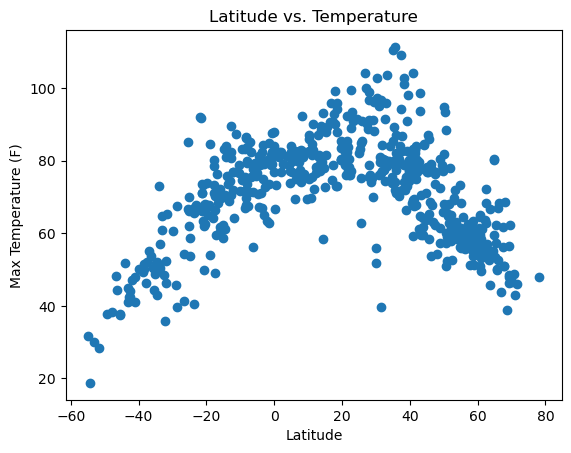

In [119]:
# Build scatter plot for latitude vs. temperature

#capomulin_data=clean_df.loc[clean_df["Drug Regimen"]=="Capomulin"]
#avg_vol_cap=capomulin_data.groupby(capomulin_data["Mouse ID"]).mean(numeric_only=True)
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"])
# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("Latitude vs. Temperature")
# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

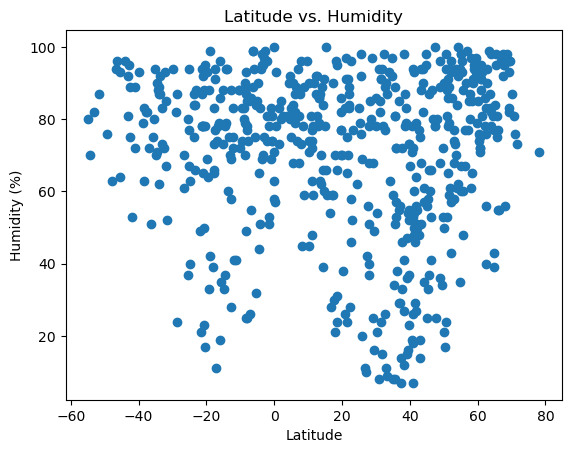

In [120]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"])

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Latitude vs. Humidity")
# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

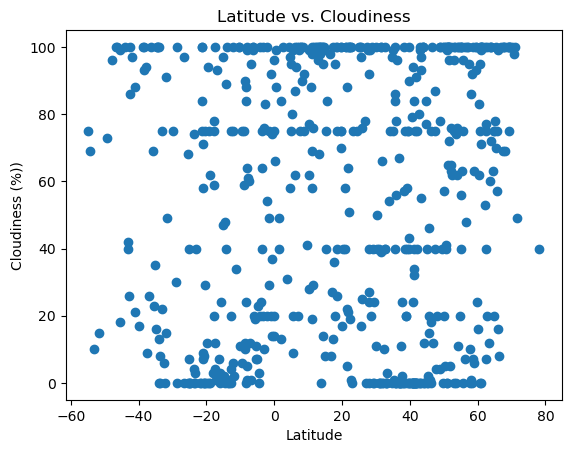

In [121]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"])

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%))")
plt.title("Latitude vs. Cloudiness")
# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

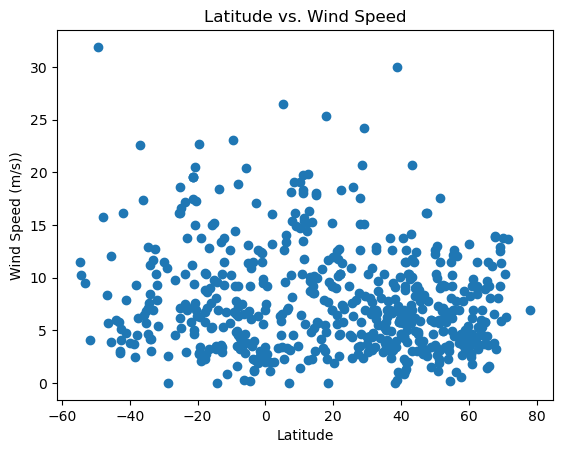

In [122]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"])

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s))")
plt.title("Latitude vs. Wind Speed")
# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [184]:
# Define a function to create Linear Regression plots
def regression_func(x_values,y_values):
    rvalue =float(0.0)
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    return regress_values, line_eq, rvalue

In [177]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hem = pd.DataFrame(city_data_df.loc[city_data_df['Lat']>=0,:])


# Display sample data
northern_hem.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,nova sintra,14.8667,-24.7167,72.75,78,8,18.01,CV,2023-07-22
1,utrik,11.2278,169.8474,82.74,72,19,18.30,MH,2023-07-22
2,albany,42.6001,-73.9662,79.65,48,0,9.84,US,2023-07-22
3,gereida,11.2811,25.1414,75.58,77,98,11.79,SD,2023-07-22
6,fortuna,40.5982,-124.1573,68.32,71,0,13.80,US,2023-07-22


In [178]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hem = pd.DataFrame(city_data_df.loc[city_data_df['Lat']<0,:])

# Display sample data
southern_hem.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
4,punta arenas,-53.1500,-70.9167,29.97,82,10,9.48,CL,2023-07-22
5,tsiombe,-25.3000,45.4833,66.76,80,68,6.13,MG,2023-07-22
7,adamstown,-25.0660,-130.1015,69.87,67,7,18.57,PN,2023-07-22
11,grytviken,-54.2811,-36.5092,18.77,70,69,10.29,GS,2023-07-22
16,port elizabeth,-33.9180,25.5701,50.09,87,0,4.21,ZA,2023-07-22


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.41058420711600735


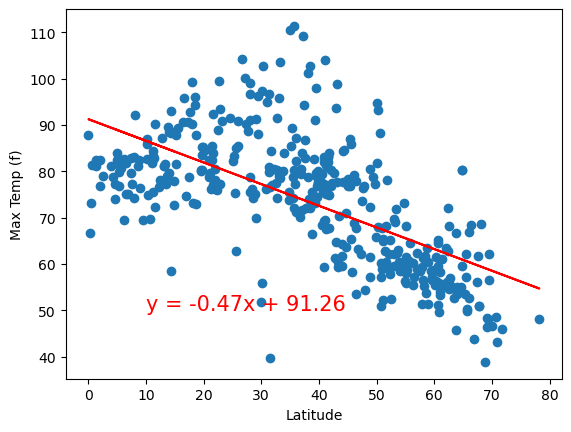

In [179]:
# Linear regression on Northern Hemisphere
x_values = northern_hem['Lat']
y_values = northern_hem['Max Temp']
regress_values, line_eq, rval = regression_func(x_values,y_values)
print(f"The r-squared is: {rval**2}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,50),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp (f)')
plt.show()

The r-squared is: 0.6808726156130589


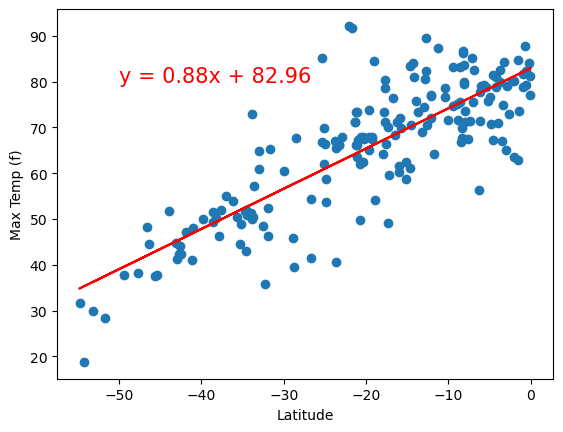

In [180]:
# Linear regression on Southern Hemisphere
x_values = southern_hem['Lat']
y_values = southern_hem['Max Temp']
regress_values, line_eq, rval= regression_func(x_values,y_values)
print(f"The r-squared is: {rval**2}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,80),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp (f)')
plt.show()

**Discussion about the linear relationship:** Based on the R values there is most likely a relationship between Latitude and temperature
The max temp in the southern hemisphere decreases at a rate of .9 for every degree of 
latitude we move away from 0. Respcitvely the max temp in the northen hemisphere decreases a rate of aprox .4 for every degree of latitude
we move away from the equator. The linear relationship will change depending on the random city dataset however after multiple runs,
the relationship seems to be very consitent with a average city count of 589 in the data set after try/except exclusions.

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.0071700704557649845


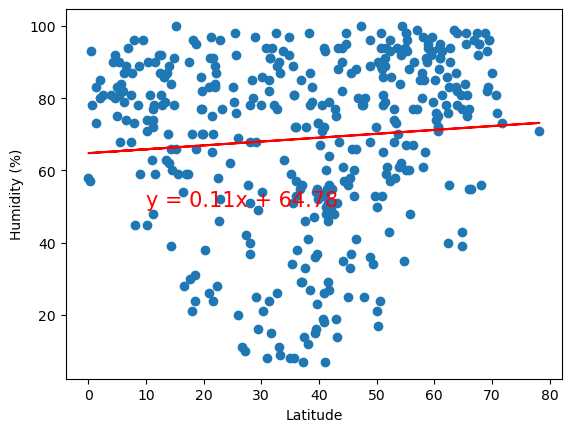

In [185]:
# Northern Hemisphere
x_values = northern_hem['Lat']
y_values = northern_hem['Humidity']
regress_values,line_eq,rval = regression_func(x_values,y_values)
print(f"The r-squared is: {rval**2}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,50),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.show()

The r-squared is: 0.0071700704557649845


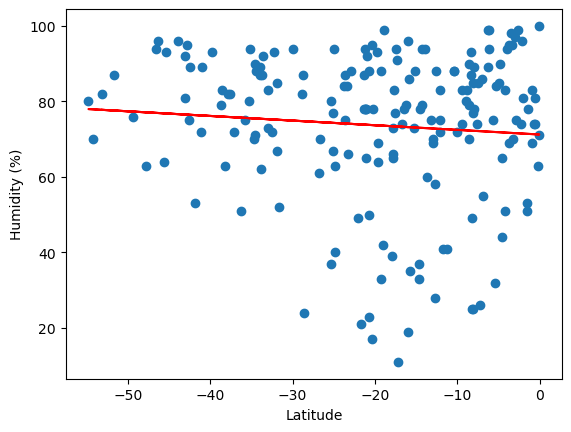

In [186]:
# Southern Hemisphere
x_values = southern_hem['Lat']
y_values = southern_hem['Humidity']
regress_values, line_eq, ravl= regression_func(x_values,y_values)
print(f"The r-squared is: {rval**2}")

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,50),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.show()

**Discussion about the linear relationship:** Based on the R values the linear regression model does not seem to fit this dataset. There does not seem to be a relationship betewen a linear relationship between humidity and latitude.
The R value is very close to 0. I would theorize that there would be more of a linear relationship between longitude and humidty if we are looking at the east or west side of a specific continent as humidity would increase the closer we get to the coast.

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.0007505770579455198


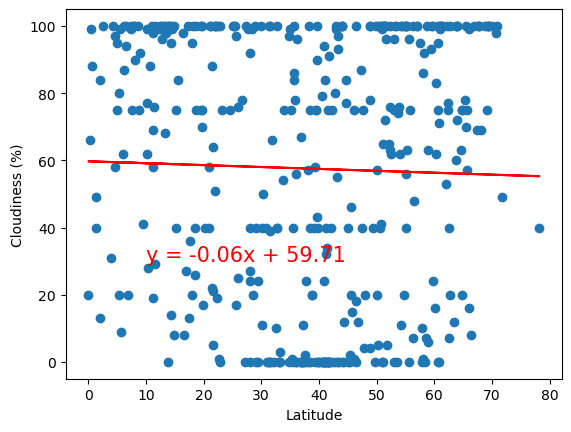

In [192]:
# Northern Hemisphere
x_values = northern_hem['Lat']
y_values = northern_hem['Cloudiness']
regress_values, line_eq, rval= regression_func(x_values,y_values)
print(f"The r-squared is: {rval**2}")
x = np.linspace(0, 10, 100)
y = 4 + 2 * np.sin(2 * x)
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,30),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.show()

The r-squared is: 0.009786108361824294


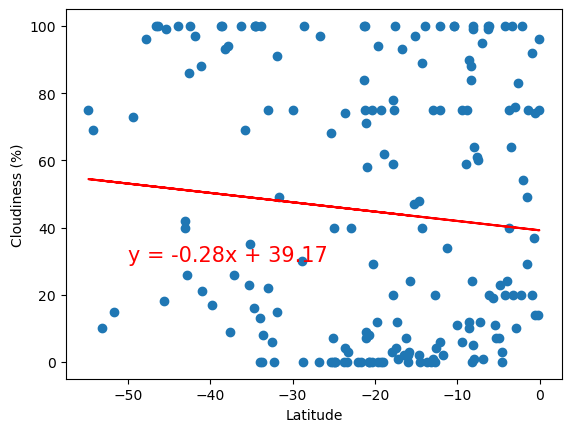

In [196]:
# Southern Hemisphere
x_values = southern_hem['Lat']
y_values = southern_hem['Cloudiness']
regress_values, line_eq, rval= regression_func(x_values,y_values)
print(f"The r-squared is: {rval**2}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,30),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.show()

**Discussion about the linear relationship:** Based on the R values linear regression model does not seem to be a good method to explain this dataset.
The R value is very close to 0. I think a logistic regression would fit this data set better.

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.04361617556908808


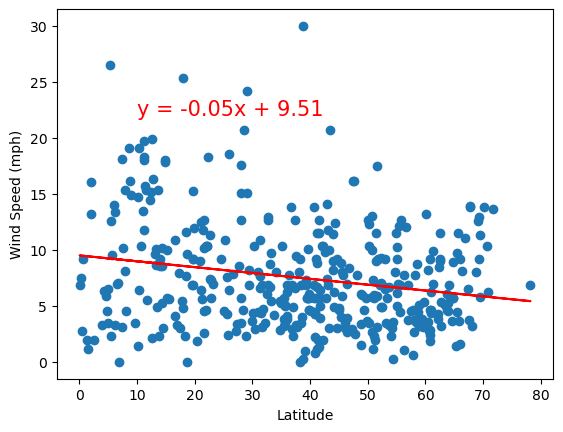

In [193]:
# Northern Hemisphere
x_values = northern_hem['Lat']
y_values = northern_hem['Wind Speed']
regress_values, line_eq, rval= regression_func(x_values,y_values)
print(f"The r-squared is: {rval**2}")

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,22),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.show()

The r-squared is: 0.01794964349965564


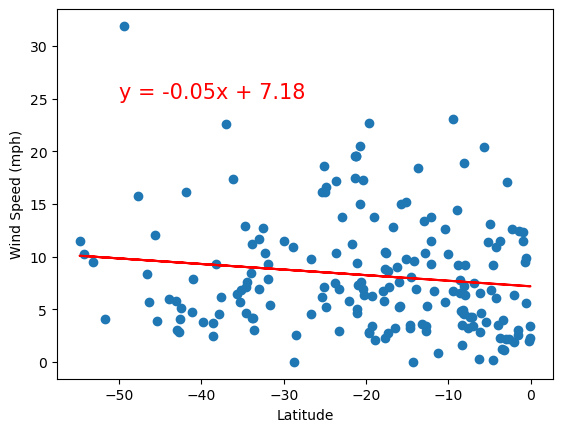

In [194]:
# Southern Hemisphere
x_values = southern_hem['Lat']
y_values = southern_hem['Wind Speed']
regress_values, line_eq, rval= regression_func(x_values,y_values)
print(f"The r-squared is: {rval**2}")

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,25),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE